<a href="https://colab.research.google.com/github/jchamilton75/CS-ST4-Cosmo-2020/blob/master/ST4_2020_Cosmology_TD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Centrale-Supélec - ST4 - Cosmology 2020 - TD1

## General Instructions (copied from G. Mention's TD1)
To do this homework, you have to download it on your own "Google Colaboratory" space (see in the "File" menu, "save a copy in your Google Drive", you will have to create a gmail account if you don't already have one) so that you can modify it as you wish. You need to train with Google Colaboratory as you will be using it for the Challenging Week (Enseignement d'Intégration).

Once you did indeed save this notebook on your own Google drive, you can modify it and save it again. If you corrupt anything by mistake, you have automatic recording of previous version which you can still acess to get back. Anyway you can still start from scratch with the default notebook if you experience really weird things with your current version.

On the Help menu above, (menu "Aide" in French) you can switch the language of the interface. For this lectures I set it to English.


## Overview
Welcome this this first practicle work in cosmology. The aim of this practicle work is to further familiarize you with python and Google Colaboratory. Remember that you will have to use this for the Enseignement d'Intégration, so you really want to get trained before...

In this first Practicle work we will address the following topics:


1.   Simple Plots with cosmological parameters
2.   Calculating distances and age of the Universe


## Simple Plots with cosmological parameters
In a python notebook, there a cells that can be "code" or "text". The code cells can be recognized by the "In[xx]" at the beginning (xx is a number that depends on the order of execution of the cells)). They can be executed by pressing "Shift+Enter" and the code they contain is executed by the machine. If there is an output, it is displayed in another cell below the input one, a cell that starts with "Out[xx]".

Before starting, one usually needs to set-up a few parameters for the notebook so that the plots are good-looking and that usual librairies are imported. This is obtained by executing the cell below:

In [1]:
import sys
print("Using Python {}".format(sys.version_info[0]))

from pylab import *
import numpy as np
%matplotlib inline
from matplotlib import rc
from importlib import reload
rc('figure',figsize=(10,5))
rc('font',size=12)
rc('text',usetex=False)

Using Python 3


### Densities as a function of redshift
We will now do our first plot, which is related to cosmology. We want to plot the evolution of the density of various species (Radiation, Matter and Cosmological constant) as a finction of redshift. This was shown is the first lecture. We use the following values for the various densities as expressed today:

In [0]:
h_0 = 0.7
omega_l_0 = 0.7
omega_r_0 = 4.3 * h_0**(-2) * 1e-5
omega_m_0 = 0.3 - omega_r_0 

We recall that: $$\Omega(z) = \Omega_r (1 + z)^4 + \Omega_m (1 + z)^3 + \Omega_\Lambda$$

We define a array containg the redshifts that we want to look at with logarithmic spacing between 1e-1 and 1e4 and 1000 elements.

In [3]:
z = np.logspace(-1, 4, 1000)

### Let's print the first 10 elements
print(z[0:10])

[0.1        0.10115911 0.10233166 0.1035178  0.10471768 0.10593148
 0.10715934 0.10840144 0.10965793 0.11092899]


We can directly calculate the densities using the redshift array as the following:

In [0]:
om_r = omega_r_0 * (1 + z)**4
om_m = omega_m_0 * (1 + z)**3
# the operation below is just a trick to have om_l be an array with the same 
# number of elements as the others
om_l = omega_l_0 + z*0       
total = om_r + om_m + om_l

Now let's do our first plot:

Text(0.5, 1.0, 'Densities as a function of Redshift')

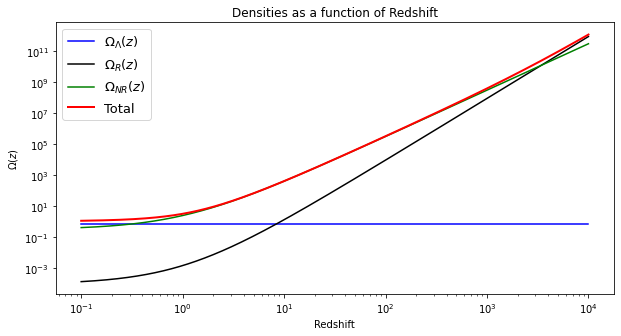

In [5]:
rc('figure',figsize=(10,5))
xscale('log')
yscale('log')
xlabel('Redshift')
ylabel(r'$\Omega(z)$')
plot(z,om_l, 'b', label = r'$\Omega_\Lambda(z)$')
plot(z,om_r, 'k', label = r'$\Omega_R(z)$')
plot(z,om_m, 'g', label = r'$\Omega_{NR}(z)$')
plot(z,total, 'r', lw=2, label = 'Total')
legend(loc='upper left', fontsize=13)
title('Densities as a function of Redshift')

***Question 1:*** Find numerically the values of the redshift of matter-radiation equality and of lambda domination, store them into a variable and print them.

In [0]:
### Type your code here

***Question 2:*** Now replot the initial plot and materialize with dotted vertical lines the values you found before. You are also requested to display the redshifts you found in the legend using python's formatted output. 

As an example for printing $\pi$ with maximum 5 characters and 2 digits:
```
print('pi is {0:5.2f}'.format(np.pi))
```

In [0]:
### Type your code here

Note the way of adding numerical values from a variable in the plot. This will be useful later.

Now you know how to make a simple plot from an array, and how to manipulate arrays and make operations with them.


## Cosmological Distances

### quick recap

Let's recall that distances in cosmology are not as straighforward as in our everyday life because of the effect of the expansion of the Universe. One needs to calculate distances on the curved and expanding manifold whose metric is given by the Friedman-Lemaître-Robertson-Walker  metric:
$$ds^2 = dt^2 - a^2(t)\left[\frac{dr^2}{1-kr^2} + r^2 d\theta^2 + r^2\sin^2\theta d\phi^2\right]$$  
where we have set $c=1$ and $k$ is the curvature parameter and can take the values -1, 0 or 1 corresponding respectively to open, flat and closed Universes.

The radial space coordinate difference between a point at 0 and a point at radius $r$ is:
$$\Delta r(z) = \int_0^r \frac{dr'}{\sqrt{1-kr'^2}}$$

For a photon, the travel is made at the speed of light whatever the referential (Relativity princinple) and the invariant $ds^2$ is therefore equal to zero:
$$ds^2 = 0 = dt^2-a^2\frac{dr^2}{1-kr^2}$$
so that
$$\frac{dr}{\sqrt{1-kr^2}}=\frac{dt}{a}$$
We also recall the definition of the redshift: $$1+z = \frac{a0}{a}$$ and differientate it with respect to time:
$$\frac{dz}{dt}= -\dot{a}\frac{a_0}{a^2}$$ implying $$\frac{dt}{a} = -\frac{dz}{a_0}\times\frac{a}{\dot{a}}$$, so finally introducing the Hubble parameters $H=\frac{\dot{a}}{a}$, we can rewrite the coordinate difference as:
$$\Delta r(z) = \frac{1}{a_0}\int_0^z \frac{dz'}{H(z')}$$.

Multiplying this coordinate difference by the scale factor today $a_0$, one get the *proper comoving distance*: $$D_P(z) = a_0 \Delta r(z) = \int_0^z \frac{dz'}{H(z')}$$

The latter can be multiplied by $1+z$ to obtain the *Luminosity Distance* or divided by $1+z$ to obtain the angular diameter distance.

### Luminosity distance calculation
We will first calculate and plot H(z) with 1000 values of z between 0 and 1 linearly spaced (function to use is linspace()) using the formula in the course for H(z) and the cosmological parameters set to the same values as above. You can also play with cosmological parameters to see the change. We recall that $$H(z)=H_0\sqrt{\Omega_k(1 + z)^2 + \Omega_\Lambda + \Omega_m (1 + z)^3}$$

***Question 3:*** Do it yourself in the following cell, the variable H(z) should be called "hz". You are then requested to plot H as a function of z. Do not forget to put labels on your axes as well as a legend.

In [0]:
### Type your code here

Now we calculate the luminosity distance $$D_l(z) = c(1+z)\int_0^z \frac{\mathrm{d}z'}{H(z')}$$ using the numerical integration features of the scipy library (trapezoidal cumulative integral):

In [0]:
import scipy.integrate
dp = np.zeros(len(z))
dp[1:] = scipy.integrate.cumtrapz(1./hz, z) * 3e5

***Question 4:*** You are asked to make a plot of Luminosity distance as a function of redshift in the following cell (remember that $D_L(z) = (1+z)\times D_p(z)$. You will call the variable containing luminosity distance "dl":

In [0]:
### Type your code here

### Using the cosmolib library
In order to simplify our lives, I have prepared a library for the purpose of this course called "cosmolib.py" which is in the same directory. I encourage you to have a look at the various codes that we will be using from this library in order to see how such tools can be simply coded.

The library requires installing two public libraries: pymc and iminuit before:

In [6]:
!pip install pymc
!pip install iminuit

     |████████████████████████████████| 389kB 8.8MB/s 
  Created wheel for pymc: filename=pymc-2.3.8-cp36-cp36m-linux_x86_64.whl size=1275951 sha256=f6078d7b0ac1764d1e462853b782beecf4c95109c1f9ae0b8caa1ddf4b1f6cc5
  Stored in directory: /root/.cache/pip/wheels/0b/a8/e7/8f3ba91a39294d538a92db052fd1fcba1fca74a58c8b022026
Successfully built pymc
     |████████████████████████████████| 4.0MB 8.0MB/s 


Now let's retrieve the cosmolib.py from GitHub directly using Google Colaboratory.

Note that we first remove a possible version of the file in the local Google Colab directory, then download it using wget, list the content of the directory. All these commands are typical unix commands that are run from Google Colaboratory by prepending an exclamation mark to tell it that it should run unix commands:

In [7]:
!rm -rf cosmolib.py*
!wget --no-check-certificate https://raw.githubusercontent.com/jchamilton75/CS-ST4-Cosmo-2020/master/cosmolib.py
!ls -lrt

--2020-05-10 12:29:43--  https://raw.githubusercontent.com/jchamilton75/CS-ST4-Cosmo-2020/master/cosmolib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14518 (14K) [text/plain]
Saving to: ‘cosmolib.py’

cosmolib.py         100%[===================>]  14.18K  --.-KB/s    in 0.003s  

2020-05-10 12:29:43 (4.21 MB/s) - ‘cosmolib.py’ saved [14518/14518]

total 20
drwxr-xr-x 1 root root  4096 May  4 16:26 sample_data
-rw-r--r-- 1 root root 14518 May 10 12:29 cosmolib.py


Now let's import the library and give it the namespace 'cs' so that everytime we'll call one of its function it will be as:
```
cs.myfunction()
```



In [8]:
import cosmolib as cs

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


It contains a function for Luminosity Distances that is slightly more precise than the one we just calculated above, but the differences are very small.

It is called in the follwing manner that uses a dictionnary to specify the value of the cosmological parameters. The three parameters that are accepted are:
- *h* for the Hubble constant at redshift 0 divided by 100
- *omega_M_0* for $\Omega_m$ today at redshift 0
- *omega_lambda_0* for $\Omega_\Lambda$ at redshift 0
- *w0* for the equation of state of Dark Energy. 

**Note:** The Dark Energy equation of state was not discussed in the lectures due to the lack of time. It is however one of the main challenges of observational cosmology to measure it today. SNIa are a sensitive probe for this parameter. The equation of state is the ratio between pressure and density of Dark Energy (as for a perfect gaz). However in the case of Dark Energy or Csomological Constant the ratio is negative (you need negative pressure to have an accelerated expansion as can be seen in the second Friedman Equation - see lectures). For a perfect Cosmological constant w=0 and for Dark Energy models it can have other values, and possibly vary with redshift. Do not worry with this now and just keep it fixed to -1.

In [0]:
z = np.linspace(0,1,1000)
cosmo_lcdm = {'h':0.7, 'omega_M_0':0.3, 'omega_lambda_0':0.7, 'w0':-1.}
dlnew = cs.lumdist(z, cosmo_lcdm)

As you see the Cosmological Parameters values are specified using a Python Dictionnary, a very useful tool in Python when one needs containers of various data types with labels for each.

***Question 5:*** In the follwing cell, you are expected to superimpose both of the luminosity distances we have calculated (if you want to play, you can also have a look at the difference or relative difference between both).

In [0]:
### Type your code here

### Angular distance:
Similarly to the luminosity distance, the cosmolib library has a angdist() function that is called the same way. We calculate it and compare to the previously calculated luminsotity distance in the following cell:

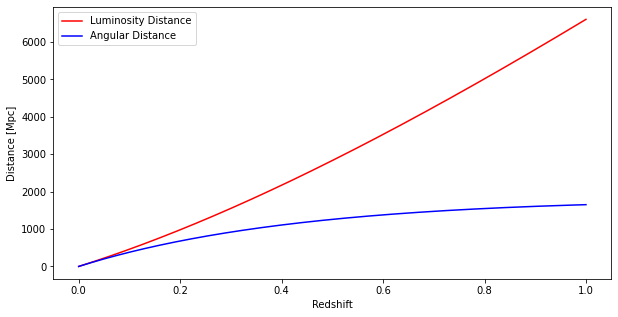

In [10]:
dang = cs.angdist(z, cosmo_lcdm)
plot(z, dlnew, 'red', label='Luminosity Distance')
plot(z, dang, 'blue', label='Angular Distance')
xlabel('Redshift')
ylabel('Distance [Mpc]')
legend()

### Overplotting Cosmological models to observational data:
Let's assume you have ran an experiment that measured angular distances  (using Baryonic Acoustic Oscillations) at various redshifts and obtain the following measurements (this is taken from the SDSS-3 Boss experiment https://arxiv.org/abs/1607.03155 with a slight conversion to make your life easier):

| Redhift | Angular Distance [Mpc] | Uncertainty on $D_A$ [Mpc] |
| --- | --- | --- |
| 0.38 | 1081 | 15 |
| 0.51 | 1276 | 19 |
| 0.61 | 1370 | 26 |

This data can be plotted in the following manner:

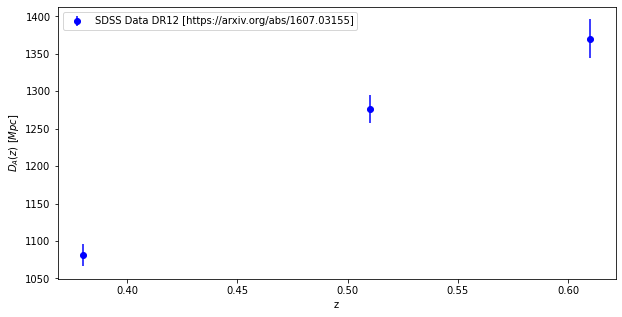

In [11]:
z_bao = np.array([0.38, 0.51, 0.61])
dang_bao = np.array([1081., 1276., 1370.])
err_dang_bao = np.array([15., 19., 26.])
errorbar(z_bao, dang_bao, yerr=err_dang_bao, fmt='bo', label='SDSS Data DR12 [https://arxiv.org/abs/1607.03155]')
xlabel('z')
ylabel('$D_A(z)~[Mpc]$')
legend(loc='upper left')

**Question 6:** Overplot the theoretical models for three sets of cosmological parameters:


1.   $\Lambda$CDM with h=0.7, $\Omega_m$=0.3, $\Omega_\Lambda$=0.7 (and $w$=-1)
2.   The so-called "open" model with h=0.7, $\Omega_m$=0.3, $\Omega_\Lambda$=0.0 (and $w$=-1)
3.   The so-called "flat" model with $\Lambda$CDM with h=0.7, $\Omega_m$=1.0, $\Omega_\Lambda$=0. (and $w$=-1)

[NB: Model 3 is called "flat" in the sense "flat with no $\Lambda$" as you all =have noticed that $\Lambda$CDM is also flat.]



In [0]:
### Type your code here

You should notice here that $\Lambda$CDM works much better, but you can also remark that changing the Hubble-Lemaître constant to other values (around 0.6 - 0.65) in the two other models gives predictions that are in quite good agreement with the data. This shows an inherent degeneracy between cosmological parameters that can only be lifted by combining different cosmological probes (BAO as here, type Ia supernovae and the CMB). You will work on this durng the "Semaine d'Intégration".

## Calculating the age of the Universe
Similarly to the distance calculation, one can calculate the time elapsed since a given redshift (we have used variable changes similar as above):
$$t(z) = \int_t^{t0} dt' = \int_0^z \frac{dz'}{(1+z')H(z')}$$

Calculating this integral from 0 to infinity gives the age of the Universe for a given cosmological model. You may implement your own calculation of the age of the Universe or use the function available in the cosmolib library:
age [Gyr] = cs.lookback(z, cosmo)

where z can be just a value or an numpy array of redshifts and cosmo is a dictionary given in the following manner:


In [0]:
cosmo_lcdm = {'h':0.7, 'omega_M_0':0.3, 'omega_lambda_0':0.7, 'w0':-1.}

Let's calculate the age of the Universe when the redshift was 0.1

In [0]:
print(cs.lookback(0.1, cosmo_lcdm))

1.3015743503698538


And let's calculate an array with ages of the Universe at various redshifts:

In [0]:
zvalues = np.array([0.1, 1, 10])
print(cs.lookback(zvalues, cosmo_lcdm))

[ 1.30157435  7.71697782 13.0038611 ]


***Question 7:*** In the next cell, calculate the time elapsed between today and 1000 redshifts logarithmically spaced between $10^{-4}$ and $10^4$ for the standard $\Lambda CDM$ cosmology and represent it as a function of redshift.

In [0]:
### Type your code here

***Question 8:*** You should see that beyond $z=10$ the elapsed time reaches its maximum, the age of the Universe whose value is therefore the maximum of this array. You are expected to print it in the following cell:

In [0]:
### Type your code here

You will now calculate this age as a function of cosmological parameters, for this you will need to perform loops and use two-dimensional arrays.

***Question 9:*** Calculate the age of Universe as a function of the matter density (30 or 100 values between 0 and 1) and the Cosmological Constant density (30 or 100 values between 0 and 1.5). For each couple of values, you will calculate the age of the Universe and fill a 2D-array. You will then represent this age using a color 2D plot using the matplotlib function *imshow()*. Do not forget to add correct axes, title and labels on the axes. You will also add a color-bar next to the image by calling the *colorbar()* function just after your 2D plot.

In [0]:
### Type your code here

***Question 10:*** You are now requested to redo the same plot adding:
- contours for various integer values of the age of the Universe (bettween 0 and 20 GYr). You should use both the *contour()* and the *contourf()* functions from matplotlib that allow you to respectively plot and fill the contours with colors. Note that these to function expect 2d arrays as x,y coordinates for the values to display, so you will have to build 2d arrays from your x and y 1d arrays using the function *np.meshgrid()*
- an additional contour (different color) for the star HE1523-0901 whose age has been measured to be 13.2 Gyr
- A star at the coordinates corresponding to $\Lambda CDM$ cosmology ($\Omega_m=0.3$, $\Omega_\Lambda=0.7$)
- A dot in a given color for the open Univserse with no $\Lambda$  ($\Omega_m=0.3$, $\Omega_\Lambda=0$)
- A dot in another color for the flat no $\Lambda$ ($\Omega_m=1$, $\Omega_\Lambda=0$)

And of course pout all these into a legend. 

In order to do the contours

At the end, you should get the following plot which look like it could be published in a paper...  ![ageUniverse](http://www.apc.univ-paris7.fr/Downloads/cosmobs/JCH/CentraleSupelec/age.png)

In [0]:
### Type your code here

End of TD1